In [1]:
# Script to graph the number of NODES for ranked enumeration
## first scenario

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns
from matplotlib.ticker import LogFormatter

In [3]:
alg_label = ["Sum of the priorities",
             "Maximum of the priorities"]
        
queries_label = ["j3","j4","p2","p3","p4","s1","s2","s3","s4","t2","t3","t4","ti2","ti3","ti4","tr1","tr2"]

queries_title = ["J3","J4","P2","P3","P4","S1","S2","S3","S4","T2","T3","T4","Ti2","Ti3","Ti4","Tr1","Tr2"]

In [4]:
# box plots for each query
j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2 = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
data = [j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]
datasets =[[],[]]


sum_strat = pd.read_csv(f'../../ranked/dfuds/backtracking/results-f0-time.csv', delimiter=';')
max_strat = pd.read_csv(f'../../ranked/dfuds/backtracking/results-f1-time.csv', delimiter=';')

datasets = [sum_strat,
               max_strat]

#   print(i)
for j,query in enumerate(queries_label):
    data[j] = [sum_strat[query],
                     max_strat[query]] 

In [5]:
# colors:
# https://matplotlib.org/stable/gallery/color/named_colors.html
#colors = ['hotpink','red','peru']#, 'lightsalmon', 'gold', 'dodgerblue', 'darkturquoise', 'mediumspringgreen', 'lime']
#colors = ['orange','lime', 'peru','lightsalmon', 'gold']
colors = ['#fc8d59','#1d91c0', '#31a354','#3182bd', '#c51b8a']

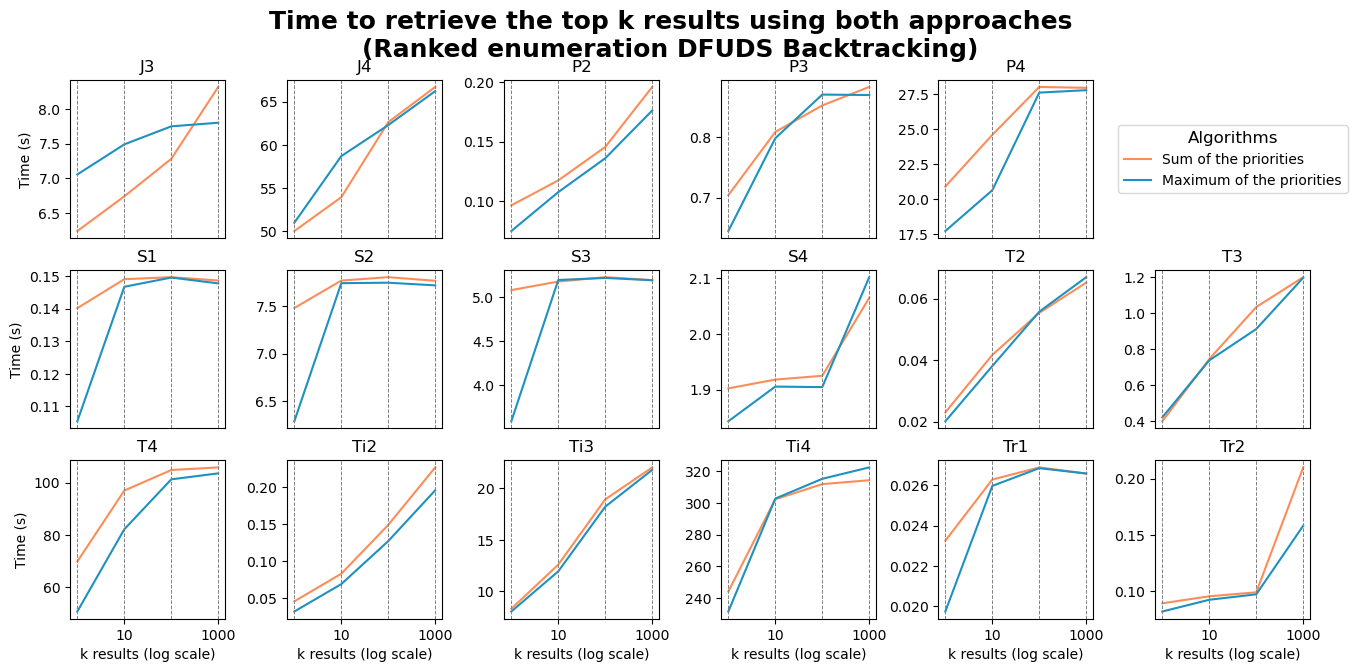

In [6]:
# Crear la figura
fig = plt.figure(figsize=(16, 7))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(3, 6, figure=fig, hspace=0.2, wspace=0.4)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])
p3 = fig.add_subplot(gs[0, 3])
p4 = fig.add_subplot(gs[0, 4])
color_legend = fig.add_subplot(gs[0, 5]) # Space for the legend
color_legend.axis('off')  # Hide the axis

s1 = fig.add_subplot(gs[1, 0])
s2 = fig.add_subplot(gs[1, 1])
s3 = fig.add_subplot(gs[1, 2])
s4 = fig.add_subplot(gs[1, 3])
t2 = fig.add_subplot(gs[1, 4])
t3 = fig.add_subplot(gs[1, 5])

t4 = fig.add_subplot(gs[2, 0])
ti2 = fig.add_subplot(gs[2, 1])
ti3 = fig.add_subplot(gs[2, 2])
ti4 = fig.add_subplot(gs[2, 3])
tr1 = fig.add_subplot(gs[2, 4])
tr2 = fig.add_subplot(gs[2, 5])

j3.set_ylabel('Time (s)')
s1.set_ylabel('Time (s)')
t4.set_ylabel('Time (s)')

t4.set_xlabel('k results (log scale)')
ti2.set_xlabel('k results (log scale)')
ti3.set_xlabel('k results (log scale)')
tr1.set_xlabel('k results (log scale)')
tr2.set_xlabel('k results (log scale)')
ti4.set_xlabel('k results (log scale)')

# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

#tr1.set_ylabel('Time (ms)')
# plot type_fun = 0
#type_fun=0

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)


for i,query in enumerate([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        query.plot(datasets[0]['k'], data[i][j], marker='', color=colors[j], label=alg_label[j])
    query.set_xscale('log')
    #query.set_yscale('log')
    query.set_title(queries_title[i])
    query.axvline(x=1, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=10, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=100, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=1000, color='gray', linestyle='--', linewidth=0.7)
    query.xaxis.set_major_formatter(LogFormatter())
    #if(query != j3 and query != s1 and query != t4):
    #    query.axes.get_yaxis().set_visible(False)
    if(query != t4 and query != ti2 and query != ti3 and query != ti4 and query != tr1 and query != tr2):
        query.axes.get_xaxis().set_visible(False)

handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=10,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=12  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

# Add a title to the entire figure
#fig.suptitle('Number of nodes visited per algorithm v/s k', fontsize=18, fontweight='bold')

fig.suptitle('Time to retrieve the top k results using both approaches\n(Ranked enumeration DFUDS Backtracking)', fontsize=18, fontweight='bold')

plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/ranked_both_approaches_variablek-time-ppt.pdf')

plt.show()
 

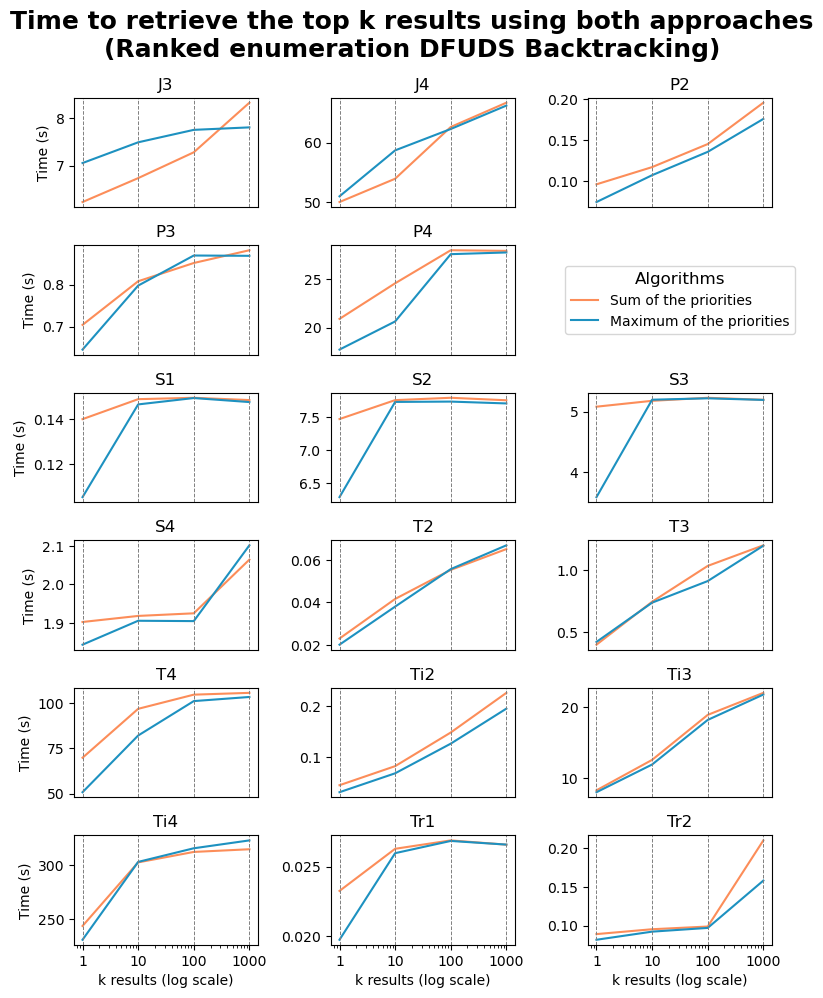

In [7]:
# Crear la figura
## TESIS VERSION
fig = plt.figure(figsize=(9, 11))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(6, 3, figure=fig, hspace=0.35, wspace=0.4)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])

p3 = fig.add_subplot(gs[1,0])
p4 = fig.add_subplot(gs[1,1])
color_legend = fig.add_subplot(gs[1,2]) # Space for the legend
color_legend.axis('off')  # Hide the axis

s1 = fig.add_subplot(gs[2, 0])
s2 = fig.add_subplot(gs[2, 1])
s3 = fig.add_subplot(gs[2, 2])

s4 = fig.add_subplot(gs[3, 0])
t2 = fig.add_subplot(gs[3, 1])
t3 = fig.add_subplot(gs[3, 2])

t4 = fig.add_subplot(gs[4, 0])
ti2 = fig.add_subplot(gs[4, 1])
ti3 = fig.add_subplot(gs[4, 2])

ti4 = fig.add_subplot(gs[5, 0])
tr1 = fig.add_subplot(gs[5, 1])
tr2 = fig.add_subplot(gs[5, 2])

j3.set_ylabel('Time (s)')
p3.set_ylabel('Time (s)')
s1.set_ylabel('Time (s)')
s4.set_ylabel('Time (s)')
t4.set_ylabel('Time (s)')
ti4.set_ylabel('Time (s)')

tr1.set_xlabel('k results (log scale)')
tr2.set_xlabel('k results (log scale)')
ti4.set_xlabel('k results (log scale)')

# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

#tr1.set_ylabel('Time (ms)')
# plot type_fun = 0
#type_fun=0

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)


for i,query in enumerate([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        query.plot(datasets[0]['k'], data[i][j], marker='', color=colors[j], label=alg_label[j])
    query.set_xscale('log')
    #query.set_yscale('log')
    query.set_title(queries_title[i])
    query.axvline(x=1, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=10, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=100, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=1000, color='gray', linestyle='--', linewidth=0.7)
    query.xaxis.set_major_formatter(LogFormatter())
    #query.yaxis.set_major_formatter(LogFormatter())
    if(query != ti4 and query != tr1 and query != tr2):
        query.axes.get_xaxis().set_visible(False)
        
handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=10,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=12  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

# Add a title to the entire figure
#fig.suptitle('Number of nodes visited per algorithm v/s k', fontsize=18, fontweight='bold')

fig.suptitle('Time to retrieve the top k results using both approaches\n(Ranked enumeration DFUDS Backtracking)', fontsize=18, fontweight='bold',y=0.96)

plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/ranked_both_approaches_variablek-time-tesis.pdf')

plt.show()
 

In [8]:
## NODES!!


In [9]:
# box plots for each query
j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2 = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
data = [j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]
datasets =[[],[]]
for i,type_fun in enumerate([0]):#,1]):


    leaves = pd.read_csv(f'../../ranked/dfuds/backtracking/results-f0-nodes.csv', delimiter=';')
    density = pd.read_csv(f'../../ranked/dfuds/backtracking/results-f1-nodes.csv', delimiter=';')
    
    datasets[i] = [leaves,
                   density]
    
 #   print(i)
    for j,query in enumerate(queries_label):
        data[j] = [leaves[query],
                         density[query]] 

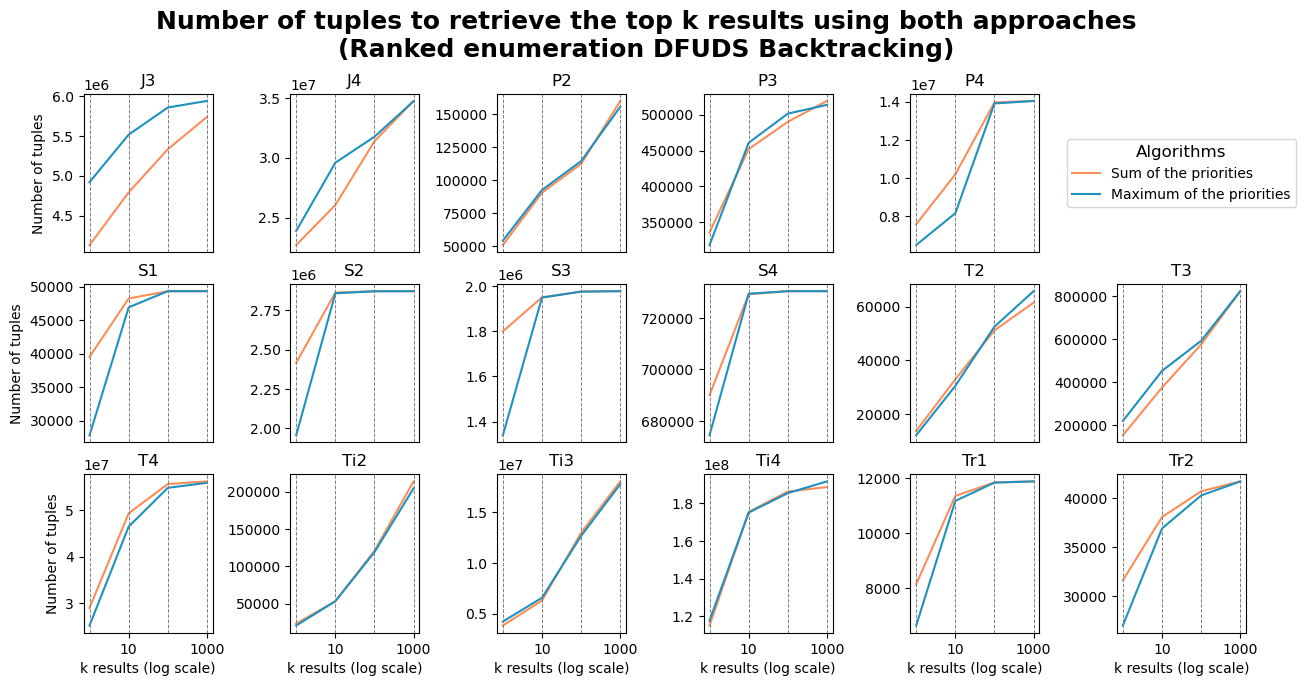

In [10]:
# Crear la figura
fig = plt.figure(figsize=(15, 7))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(3, 6, figure=fig, hspace=0.2, wspace=0.6)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])
p3 = fig.add_subplot(gs[0, 3])
p4 = fig.add_subplot(gs[0, 4])
color_legend = fig.add_subplot(gs[0, 5]) # Space for the legend
color_legend.axis('off')  # Hide the axis

s1 = fig.add_subplot(gs[1, 0])
s2 = fig.add_subplot(gs[1, 1])
s3 = fig.add_subplot(gs[1, 2])
s4 = fig.add_subplot(gs[1, 3])
t2 = fig.add_subplot(gs[1, 4])
t3 = fig.add_subplot(gs[1, 5])

t4 = fig.add_subplot(gs[2, 0])
ti2 = fig.add_subplot(gs[2, 1])
ti3 = fig.add_subplot(gs[2, 2])
ti4 = fig.add_subplot(gs[2, 3])
tr1 = fig.add_subplot(gs[2, 4])
tr2 = fig.add_subplot(gs[2, 5])

j3.set_ylabel('Number of tuples')
s1.set_ylabel('Number of tuples')
t4.set_ylabel('Number of tuples')

t4.set_xlabel('k results (log scale)')
ti2.set_xlabel('k results (log scale)')
ti3.set_xlabel('k results (log scale)')
tr1.set_xlabel('k results (log scale)')
tr2.set_xlabel('k results (log scale)')
ti4.set_xlabel('k results (log scale)')

# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

#tr1.set_ylabel('Time (ms)')
# plot type_fun = 0
#type_fun=0

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)


for i,query in enumerate([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        query.plot(datasets[0][0]['k'], data[i][j], marker='', color=colors[j], label=alg_label[j])
    query.set_xscale('log')
    #query.set_yscale('log')
    query.set_title(queries_title[i])
    query.axvline(x=1, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=10, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=100, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=1000, color='gray', linestyle='--', linewidth=0.7)
    query.xaxis.set_major_formatter(LogFormatter())
    #query.yaxis.set_major_formatter(LogFormatter())
    #if(query != j3 and query != s1 and query != t4):
    #    query.axes.get_yaxis().set_visible(False)
    if(query != t4 and query != ti2 and query != ti3 and query != ti4 and query != tr1 and query != tr2):
        query.axes.get_xaxis().set_visible(False)

handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=10,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=12  # Set font size for the title
)


fig.suptitle('Number of tuples to retrieve the top k results using both approaches\n(Ranked enumeration DFUDS Backtracking)', fontsize=18, fontweight='bold',y=1)

plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/ranked_both_approaches_variablek-nodes-ppt.pdf')

plt.show()
 

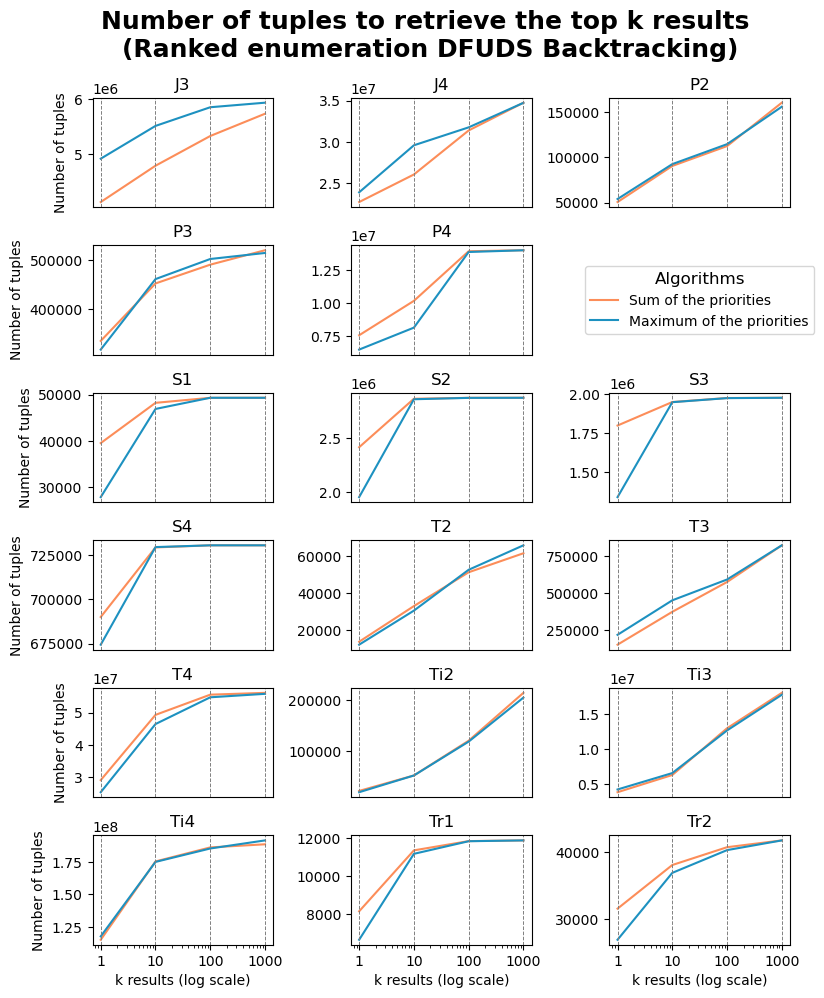

In [11]:
# Crear la figura
## TESIS VERSION
fig = plt.figure(figsize=(9, 11))

# Crear un GridSpec con la distribución deseada
gs = gridspec.GridSpec(6, 3, figure=fig, hspace=0.35, wspace=0.43)

# Añadir los subplots a la figura
j3 = fig.add_subplot(gs[0, 0])
j4 = fig.add_subplot(gs[0, 1])
p2 = fig.add_subplot(gs[0, 2])

p3 = fig.add_subplot(gs[1,0])
p4 = fig.add_subplot(gs[1,1])
color_legend = fig.add_subplot(gs[1,2]) # Space for the legend
color_legend.axis('off')  # Hide the axis

s1 = fig.add_subplot(gs[2, 0])
s2 = fig.add_subplot(gs[2, 1])
s3 = fig.add_subplot(gs[2, 2])

s4 = fig.add_subplot(gs[3, 0])
t2 = fig.add_subplot(gs[3, 1])
t3 = fig.add_subplot(gs[3, 2])

t4 = fig.add_subplot(gs[4, 0])
ti2 = fig.add_subplot(gs[4, 1])
ti3 = fig.add_subplot(gs[4, 2])

ti4 = fig.add_subplot(gs[5, 0])
tr1 = fig.add_subplot(gs[5, 1])
tr2 = fig.add_subplot(gs[5, 2])

j3.set_ylabel('Number of tuples')
p3.set_ylabel('Number of tuples')
s1.set_ylabel('Number of tuples')
s4.set_ylabel('Number of tuples')
t4.set_ylabel('Number of tuples')
ti4.set_ylabel('Number of tuples')

tr1.set_xlabel('k results (log scale)')
tr2.set_xlabel('k results (log scale)')
ti4.set_xlabel('k results (log scale)')

# Adjusting the limits for ti4 (or use log scale)
#ti4.set_yscale('log')  # Use logarithmic scale if the difference is large

#tr1.set_ylabel('Time (ms)')
# plot type_fun = 0
#type_fun=0

# Establecer límites específicos para cada subplot si es necesario
#j3.set_ylim(5, 8)
#s1.set_ylim(1, 30)
#t4.set_ylim(1, 1000)


for i,query in enumerate([j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    for j, alg in enumerate(alg_label):
        query.plot(datasets[0][0]['k'], data[i][j], marker='', color=colors[j], label=alg_label[j])
    query.set_xscale('log')
    #query.set_yscale('log')
    query.set_title(queries_title[i])
    query.axvline(x=1, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=10, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=100, color='gray', linestyle='--', linewidth=0.7)
    query.axvline(x=1000, color='gray', linestyle='--', linewidth=0.7)
    query.xaxis.set_major_formatter(LogFormatter())
    #query.yaxis.set_major_formatter(LogFormatter())
    if(query != ti4 and query != tr1 and query != tr2):
        query.axes.get_xaxis().set_visible(False)

handles, labels = j3.get_legend_handles_labels()

color_legend.legend(
    handles,
    labels,
    loc='center',
    fontsize=10,  # Increase font size for the legend
    title='Algorithms',  # Add title
    title_fontsize=12  # Set font size for the title
)

# Global ylabel
#fig.text(0.07, 0.6, 'Number of nodes visited', va='center', rotation='vertical', fontsize=20)

# Add a title to the entire figure
#fig.suptitle('Number of nodes visited per algorithm v/s k', fontsize=18, fontweight='bold')

fig.suptitle('Number of tuples to retrieve the top k results \n(Ranked enumeration DFUDS Backtracking)', fontsize=18, fontweight='bold',y=0.96)

plt.savefig('/Users/asugomez/Documentos/Magister/Tesis/tesisQdags/imagenes/ranked_both_approaches_variablek-nodes-tesis.pdf')

plt.show()
 